In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 35s 90ms/step - loss: 0.4440 - accuracy: 0.7868 - val_loss: 0.3136 - val_accuracy: 0.8724
Epoch 2/10
391/391 [==============================] - 22s 57ms/step - loss: 0.2225 - accuracy: 0.9172 - val_loss: 0.2999 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 21s 53ms/step - loss: 0.1704 - accuracy: 0.9389 - val_loss: 0.3291 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1389 - accuracy: 0.9496 - val_loss: 0.4450 - val_accuracy: 0.8471
Epoch 5/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1139 - accuracy: 0.9609 - val_loss: 0.4420 - val_accuracy: 0.8636
Epoch 6/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0915 - accuracy: 0.9691 - val_loss: 0.4899 - val_accuracy: 0.8596
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0753 - accuracy: 0.9753 - val_loss: 0.5395 - val_accuracy:

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

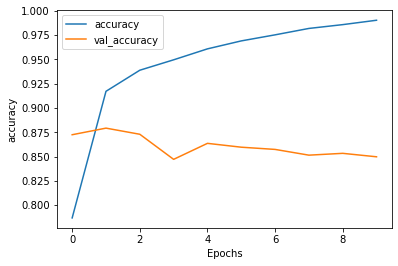

In [10]:
plot_graphs(history, 'accuracy')

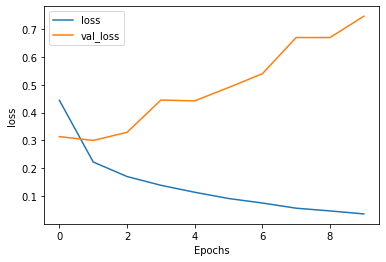

In [11]:
plot_graphs(history, 'loss')